# Setup

In [77]:
# Data Wrangling
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning Utils
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [78]:
# Defining plot standard parameters
plt.rcParams.update(
    {
        "axes.labelcolor": "#595959",
        "axes.facecolor": (0, 0, 0, 0),
        "axes.grid": False,
        "axes.labelpad": 6,
        "axes.spines.right": False,
        "axes.spines.top": False,
        "figure.facecolor": (0, 0, 0, 0),
        "figure.dpi": 100,
        "legend.borderaxespad": 0,
        "legend.framealpha": None,
        "legend.fontsize": 8,
        "legend.loc": "upper center",
        "legend.title_fontsize": 9,
        "text.color": "#595959",
        "xtick.color": "#D9D9D9",
        "xtick.labelcolor": "#595959",
        "ytick.color": "#D9D9D9",
        "ytick.labelcolor": "#595959",
    }
)

In [79]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show() 

# Loading Data

In [80]:
data = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")

X = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv")
Y = data["Class"].to_numpy()

# Preparing Data

In [81]:
transform = preprocessing.StandardScaler()
X = transform.fit_transform(X)

In [82]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=.2, random_state=2
)

# Modelling

## Logistic Regression

In [83]:
parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}

In [84]:
lr=LogisticRegression()
logreg_cv = GridSearchCV(
    estimator=lr,
    param_grid=parameters,
    cv=10,
)
logreg_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

tuned hyperparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
train accuracy : 0.8464285714285713
test accuracy : 0.8333333333333334


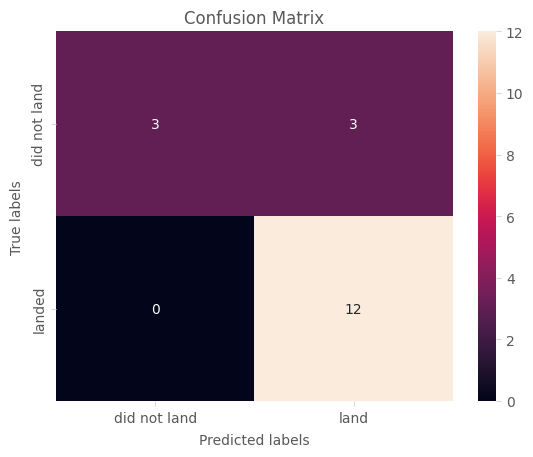

In [85]:
print("tuned hyperparameters :(best parameters) ",logreg_cv.best_params_)
print("train accuracy :",logreg_cv.best_score_)
print("test accuracy :",logreg_cv.score(X_test, Y_test))
yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## Support Vector Machines

In [86]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}

In [87]:
svm = SVC()
svm_cv = GridSearchCV(
    estimator=svm,
    param_grid=parameters,
    cv=10,
)
svm_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'gamma': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'kernel': ('linear', 'rbf', 'poly', 'rbf', 'sigmoid')})

tuned hyperparameters :(best parameters)  {'C': np.float64(1.0), 'gamma': np.float64(0.03162277660168379), 'kernel': 'sigmoid'}
train accuracy : 0.8482142857142856
test accuracy : 0.8333333333333334


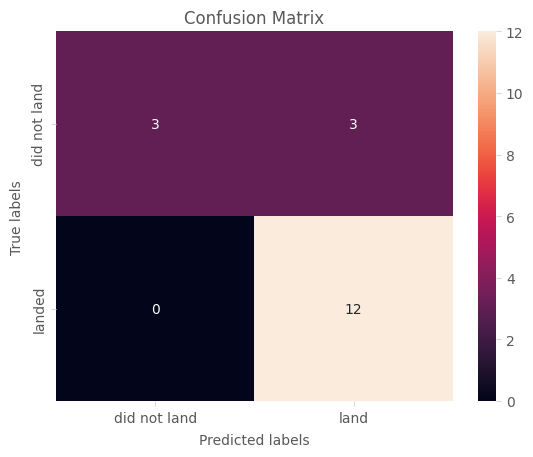

In [88]:
print("tuned hyperparameters :(best parameters) ",svm_cv.best_params_)
print("train accuracy :",svm_cv.best_score_)
print("test accuracy :",svm_cv.score(X_test, Y_test))
yhat=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## Decision Tree

In [89]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

In [90]:
tree = DecisionTreeClassifier()
tree_cv = GridSearchCV(
    estimator=tree,
    param_grid=parameters,
    cv=10,
)
tree_cv.fit(X_train, Y_train)

/Users/ewerthon/Documents/Materiais/[Recursos] Ciência de Dados/ml-spacey/venv/lib/python3.12/site-packages/numpy/ma/core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

tuned hyperparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 14, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'best'}
train accuracy : 0.8875
test accuracy : 0.8888888888888888


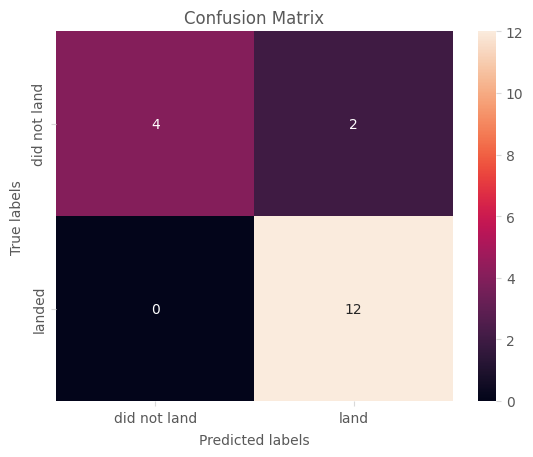

In [91]:
print("tuned hyperparameters :(best parameters) ",tree_cv.best_params_)
print("train accuracy :",tree_cv.best_score_)
print("test accuracy :",tree_cv.score(X_test, Y_test))
yhat=tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## K Nearest Neighbors

In [92]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

In [93]:
KNN = KNeighborsClassifier()
knn_cv = GridSearchCV(
    estimator=KNN,
    param_grid=parameters,
    cv=10,
)
knn_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

tuned hyperparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
train accuracy : 0.8482142857142858
test accuracy : 0.8333333333333334


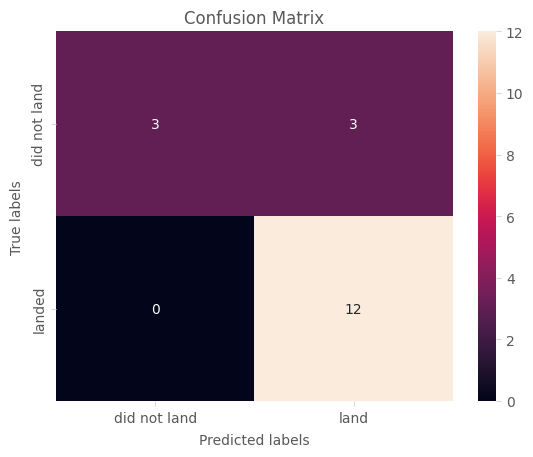

In [94]:
print("tuned hyperparameters :(best parameters) ",knn_cv.best_params_)
print("train accuracy :",knn_cv.best_score_)
print("test accuracy :",knn_cv.score(X_test, Y_test))
yhat=knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

# Final Model

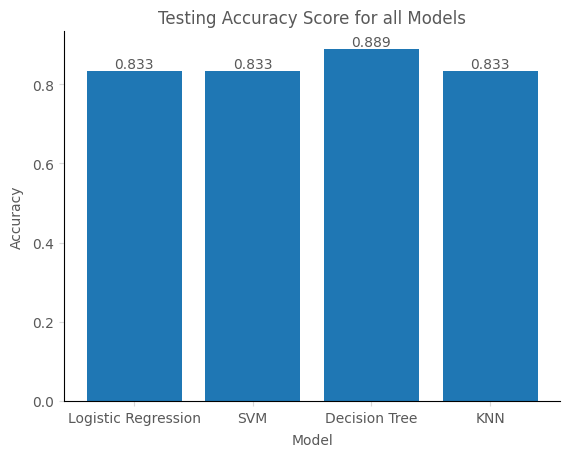

In [95]:
fig, ax = plt.subplots()

ax.bar(
    x=[
        "Logistic Regression",
        "SVM",
        "Decision Tree",
        "KNN",
    ],
    height=[
        logreg_cv.score(X_test, Y_test),
        svm_cv.score(X_test, Y_test),
        tree_cv.score(X_test, Y_test),
        knn_cv.score(X_test, Y_test),
    ]
)

ax.set_title("Testing Accuracy Score for all Models")
ax.set_xlabel("Model")
ax.set_ylabel("Accuracy")
ax.bar_label(ax.containers[0], fmt="%.3f");

Best performing method: Decision Tree